    Используя kmeans сделать кластеризацию футбольных команд по стоимости и количеству проигрышей, результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров. Если стоимость команд не указана, то сгенерировать случайные стоимости для команд.

In [47]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from scipy.cluster.vq import whiten, kmeans2
import time
from pprint import pprint
import random

In [48]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
#         print(json)
        return None

In [49]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/467/teams', 'teams')
teams[10]

{'_links': {'self': {'href': 'http://api.football-data.org/v1/teams/762'},
  'fixtures': {'href': 'http://api.football-data.org/v1/teams/762/fixtures'},
  'players': {'href': 'http://api.football-data.org/v1/teams/762/players'}},
 'name': 'Argentina',
 'code': 'ARG',
 'shortName': None,
 'squadMarketValue': None,
 'crestUrl': 'https://upload.wikimedia.org/wikipedia/commons/1/1a/Flag_of_Argentina.svg'}

In [50]:
def is_team_loses(result, role):
    if role == 'home':
        if result['goalsHomeTeam'] < result['goalsAwayTeam']:
            return True
        elif result['goalsHomeTeam'] > result['goalsAwayTeam']:
            return False
        else:
            if 'penaltyShootout' in result:
                if result['penaltyShootout']['goalsHomeTeam'] < result['penaltyShootout']['goalsHomeTeam']:
                    return True
                else:
                    return False
            else:
                return False
    else:
        if result['goalsHomeTeam'] > result['goalsAwayTeam']:
            return True
        elif result['goalsHomeTeam'] < result['goalsAwayTeam']:
            return False
        else:
            if 'penaltyShootout' in result:
                if result['penaltyShootout']['goalsHomeTeam'] > result['penaltyShootout']['goalsHomeTeam']:
                    return True
                else:
                    return False
            else:
                return False
    return False

In [51]:
def gen_random_cost():
    return random.randint(10000, 10000000)

In [58]:
for team in teams:
#     time.sleep(2)
#     players = call_api(team['_links']['players']['href'], 'players')
#     pprint(players)
    time.sleep(2)
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
#     pprint(fixtures)
    loses = 0
    for f in fixtures:
        if 'FINISHED' not in f['status']:
            continue
        if team['name'] == f['homeTeamName']:
            if is_team_loses(f['result'], 'home'):
                loses += 1 
#                 print('{} loses {}!'.format(f['homeTeamName'], f['awayTeamName']))
        else:
            if is_team_loses(f['result'], 'away'):
                loses += 1 
#                 print('{} loses {}!'.format(f['awayTeamName'], f['homeTeamName']))
            
    team['cost'] =  team['squadMarketValue'] if team['squadMarketValue'] is not None else gen_random_cost()
    team['loses'] = loses
    print('Team "{}", {} cost, {} loses'.format(team['name'], team['cost'], team['loses']))

Team "Russia", 3449603 cost, 1 loses
Team "Saudi Arabia", 4671483 cost, 2 loses
Team "Egypt", 20458 cost, 3 loses
Team "Uruguay", 5403920 cost, 1 loses
Team "Morocco", 5114912 cost, 2 loses
Team "Iran", 3169052 cost, 1 loses
Team "Portugal", 4467502 cost, 1 loses
Team "Spain", 9040706 cost, 0 loses
Team "France", 2999501 cost, 0 loses
Team "Australia", 1816153 cost, 2 loses
Team "Argentina", 3997424 cost, 2 loses
Team "Iceland", 4941229 cost, 2 loses
Team "Peru", 6867376 cost, 2 loses
Team "Denmark", 6676872 cost, 0 loses
Team "Croatia", 2616956 cost, 0 loses
Team "Nigeria", 5061021 cost, 2 loses
Team "Costa Rica", 6132039 cost, 2 loses
Team "Serbia", 3341512 cost, 2 loses
Team "Germany", 4915282 cost, 2 loses
Team "Mexico", 7333525 cost, 2 loses
Team "Brazil", 4051043 cost, 1 loses
Team "Switzerland", 1672788 cost, 1 loses
Team "Sweden", 3126932 cost, 2 loses
Team "Korea Republic", 1177124 cost, 2 loses
Team "Belgium", 5930957 cost, 0 loses
Team "Panama", 1332193 cost, 3 loses
Team "T

In [72]:
team_for_pd = []
for team in teams:
    if team['cost']:
        team_for_pd.append({'name': team['name'], 'cost': team['cost'], 'loses': team['loses']})
team_for_pd

[{'name': 'Russia', 'cost': 3449603, 'loses': 1},
 {'name': 'Saudi Arabia', 'cost': 4671483, 'loses': 2},
 {'name': 'Egypt', 'cost': 20458, 'loses': 3},
 {'name': 'Uruguay', 'cost': 5403920, 'loses': 1},
 {'name': 'Morocco', 'cost': 5114912, 'loses': 2},
 {'name': 'Iran', 'cost': 3169052, 'loses': 1},
 {'name': 'Portugal', 'cost': 4467502, 'loses': 1},
 {'name': 'Spain', 'cost': 9040706, 'loses': 0},
 {'name': 'France', 'cost': 2999501, 'loses': 0},
 {'name': 'Australia', 'cost': 1816153, 'loses': 2},
 {'name': 'Argentina', 'cost': 3997424, 'loses': 2},
 {'name': 'Iceland', 'cost': 4941229, 'loses': 2},
 {'name': 'Peru', 'cost': 6867376, 'loses': 2},
 {'name': 'Denmark', 'cost': 6676872, 'loses': 0},
 {'name': 'Croatia', 'cost': 2616956, 'loses': 0},
 {'name': 'Nigeria', 'cost': 5061021, 'loses': 2},
 {'name': 'Costa Rica', 'cost': 6132039, 'loses': 2},
 {'name': 'Serbia', 'cost': 3341512, 'loses': 2},
 {'name': 'Germany', 'cost': 4915282, 'loses': 2},
 {'name': 'Mexico', 'cost': 73335

In [73]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

cost  loses            name
0   3449603      1          Russia
1   4671483      2    Saudi Arabia
2     20458      3           Egypt
3   5403920      1         Uruguay
4   5114912      2         Morocco
5   3169052      1            Iran
6   4467502      1        Portugal
7   9040706      0           Spain
8   2999501      0          France
9   1816153      2       Australia
10  3997424      2       Argentina
11  4941229      2         Iceland
12  6867376      2            Peru
13  6676872      0         Denmark
14  2616956      0         Croatia
15  5061021      2         Nigeria
16  6132039      2      Costa Rica
17  3341512      2          Serbia
18  4915282      2         Germany
19  7333525      2          Mexico
20  4051043      1          Brazil
21  1672788      1     Switzerland
22  3126932      2          Sweden
23  1177124      2  Korea Republic
24  5930957      0         Belgium
25  1332193      3          Panama
26  6090431      2         Tunisia
27  4589673      1         England
28  2586817      1        Colombia
29  8715961      2           Japan
30  1665515      2          Poland
31   298801      1         Senegal

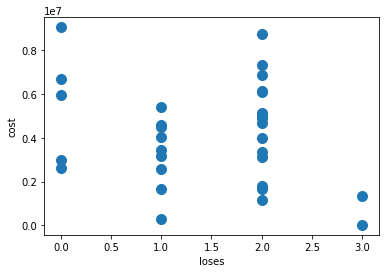

In [74]:
teams_pd.plot.scatter(x='loses', y='cost', s=100)

In [75]:
del teams_pd['name']
teams_pd

cost  loses
0   3449603      1
1   4671483      2
2     20458      3
3   5403920      1
4   5114912      2
5   3169052      1
6   4467502      1
7   9040706      0
8   2999501      0
9   1816153      2
10  3997424      2
11  4941229      2
12  6867376      2
13  6676872      0
14  2616956      0
15  5061021      2
16  6132039      2
17  3341512      2
18  4915282      2
19  7333525      2
20  4051043      1
21  1672788      1
22  3126932      2
23  1177124      2
24  5930957      0
25  1332193      3
26  6090431      2
27  4589673      1
28  2586817      1
29  8715961      2
30  1665515      2
31   298801      1

In [76]:
whitened = whiten(teams_pd.as_matrix())
whitened

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1.54096114, 1.20690286],
       [2.08678325, 2.41380572],
       [0.00913873, 3.62070857],
       [2.41396784, 1.20690286],
       [2.284866  , 2.41380572],
       [1.4156371 , 1.20690286],
       [1.99566355, 1.20690286],
       [4.0385449 , 0.        ],
       [1.33989751, 0.        ],
       [0.81128791, 2.41380572],
       [1.78567651, 2.41380572],
       [2.20728062, 2.41380572],
       [3.0677036 , 2.41380572],
       [2.98260416, 0.        ],
       [1.16901206, 0.        ],
       [2.26079252, 2.41380572],
       [2.73922355, 2.41380572],
       [1.49267615, 2.41380572],
       [2.19568992, 2.41380572],
       [3.27593553, 2.41380572],
       [1.80962848, 1.20690286],
       [0.74724578, 1.20690286],
       [1.39682181, 2.41380572],
       [0.5258293 , 2.41380572],
       [2.64939886, 0.        ],
       [0.59509968, 3.62070857],
       [2.72063698, 2.41380572],
       [2.05023816, 1.20690286],
       [1.15554876, 1.20690286],
       [3.8934791 , 2.41380572],
       [0.

In [77]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[2.5925516 , 2.41380572],
        [0.71728585, 2.41380572],
        [2.04675854, 0.70402667]]),
 array([2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1,
        1, 1, 2, 1, 0, 2, 2, 0, 1, 1]))

In [78]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'r',
 'g',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'g',
 'r',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'g',
 'r',
 'r',
 'b',
 'g',
 'g',
 'g',
 'b',
 'g',
 'r',
 'b',
 'b',
 'r',
 'g',
 'g']

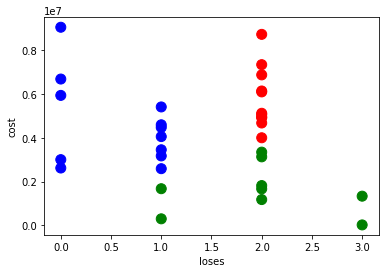

In [79]:
teams_pd.plot.scatter(x='loses', y='cost', c=colors, s=100)

In [80]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\vq.py:525: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[1.25445478, 0.        ],
        [0.71354086, 2.56466857],
        [1.64111135, 1.20690286],
        [2.5925516 , 2.41380572],
        [3.22351597, 0.        ]]),
 array([2, 3, 1, 2, 3, 2, 2, 4, 0, 1, 3, 3, 3, 4, 0, 3, 3, 1, 3, 3, 2, 2,
        1, 1, 4, 1, 3, 2, 2, 3, 1, 1]))

In [81]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'y',
 'g',
 'b',
 'y',
 'b',
 'b',
 'm',
 'r',
 'g',
 'y',
 'y',
 'y',
 'm',
 'r',
 'y',
 'y',
 'g',
 'y',
 'y',
 'b',
 'b',
 'g',
 'g',
 'm',
 'g',
 'y',
 'b',
 'b',
 'y',
 'g',
 'g']

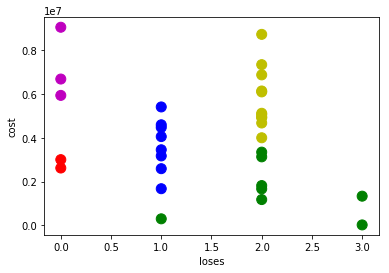

In [82]:
teams_pd.plot.scatter(x='loses', y='cost', c=colors, s=100)